# Diabetes prediction

**Metric: F1 Score**



In [1]:
#pip install --use-deprecated=legacy-resolver pycaret[full]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
path = 'diabetes.csv'
df = pd.read_csv(path)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Replace zero values**
* Glucose
* BloodPressure
* BMI
* SkinThickness
* Insulin

In [8]:
for i in ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']:
  df[i].replace(0, df[i].mean(), inplace = True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [10]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

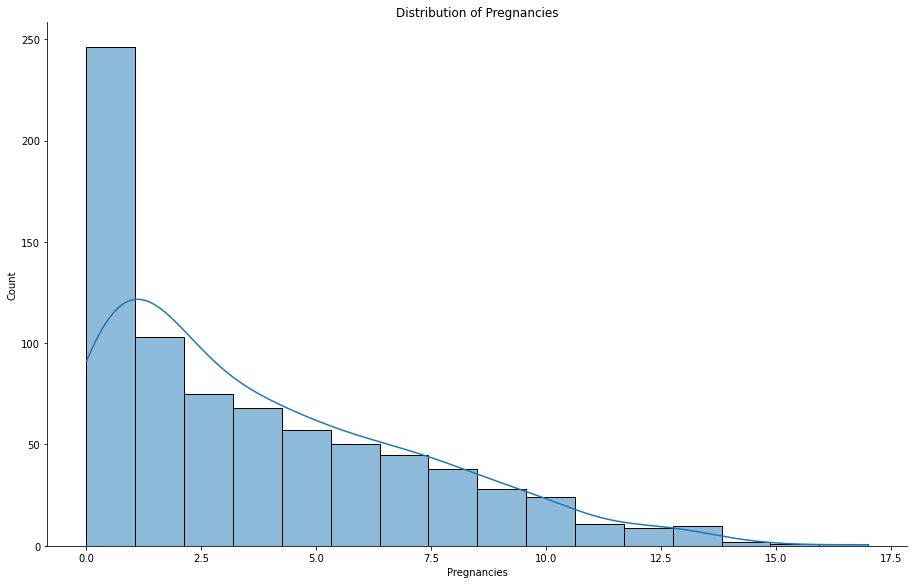

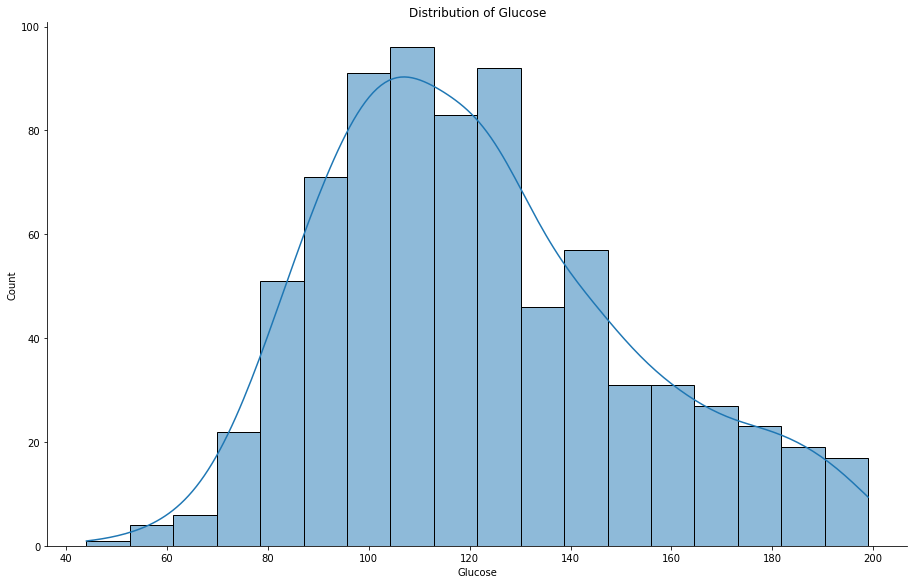

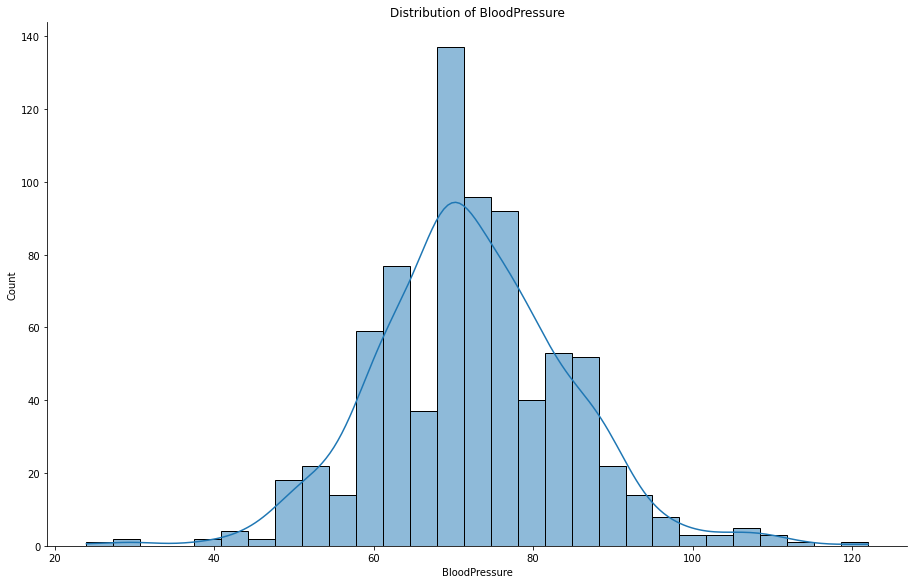

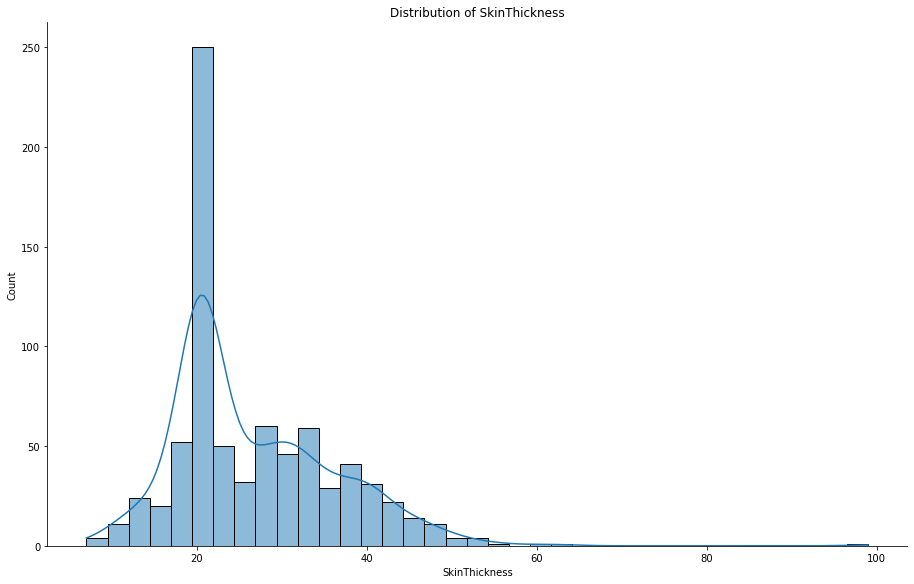

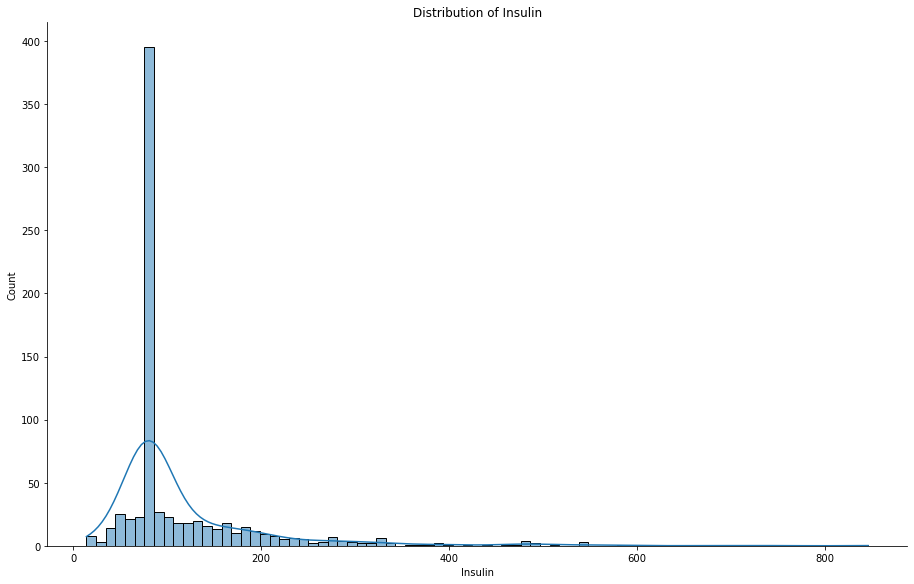

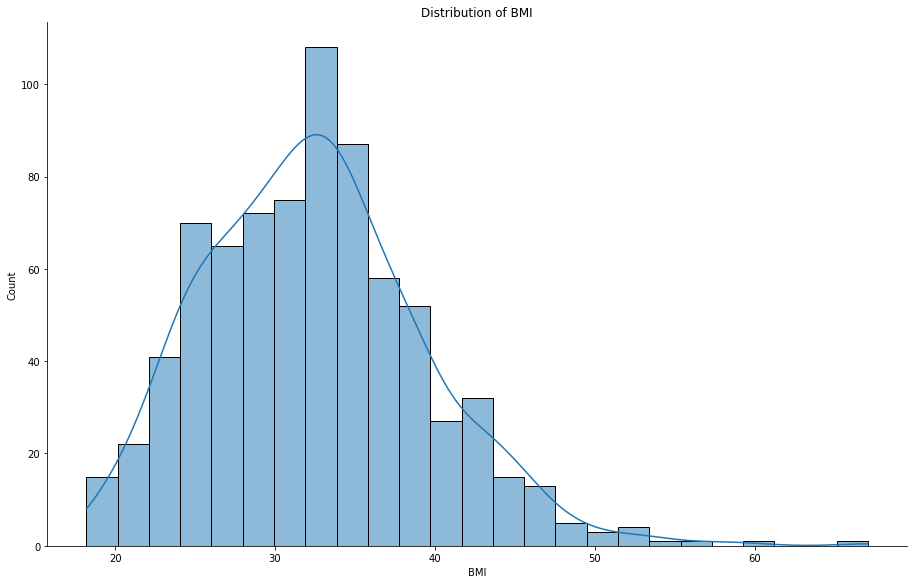

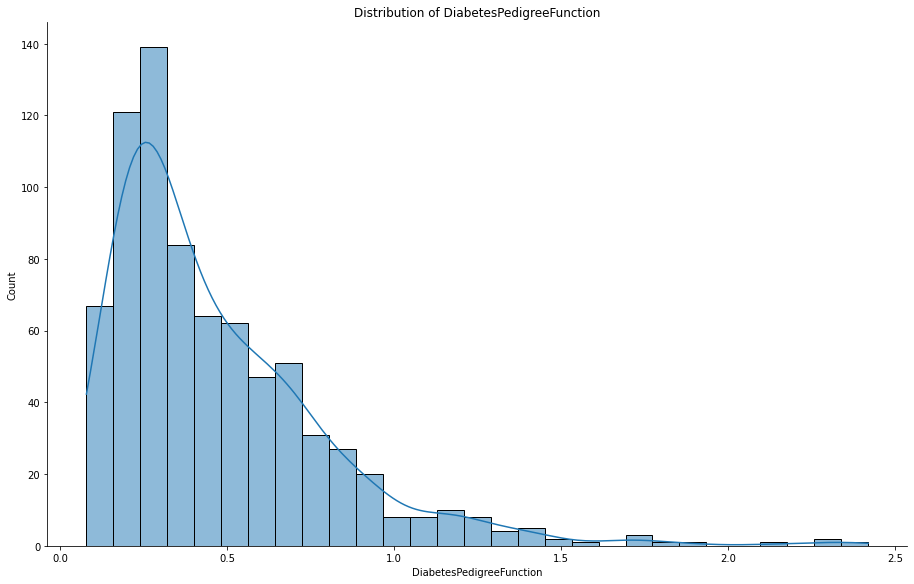

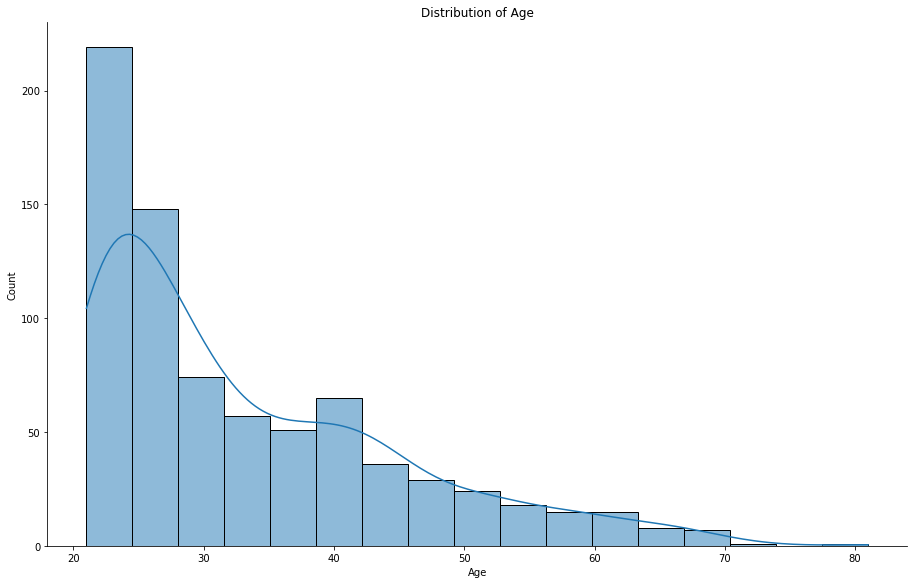

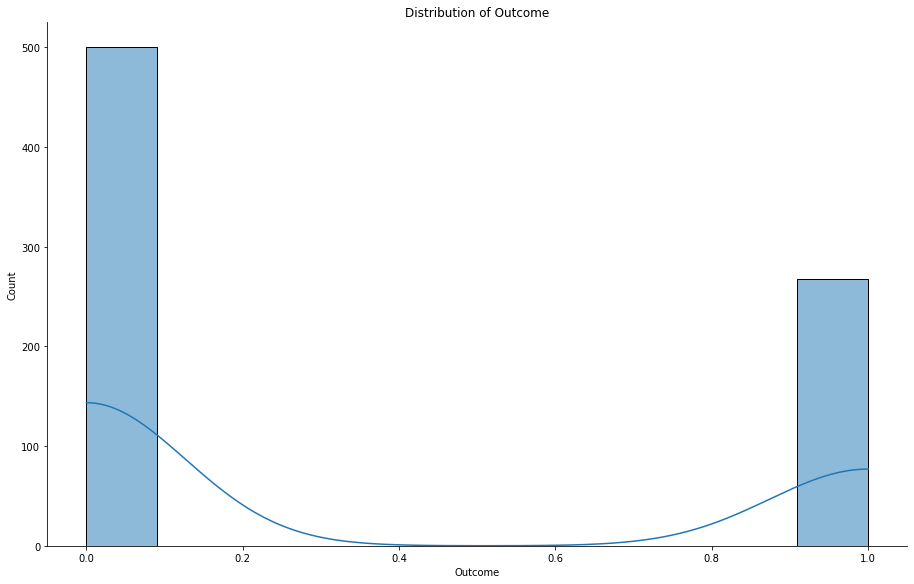

In [11]:
for i in range(len(df.columns)):
  plot_continuous_distribution(df, df.columns[i])

<AxesSubplot:xlabel='Age', ylabel='count'>

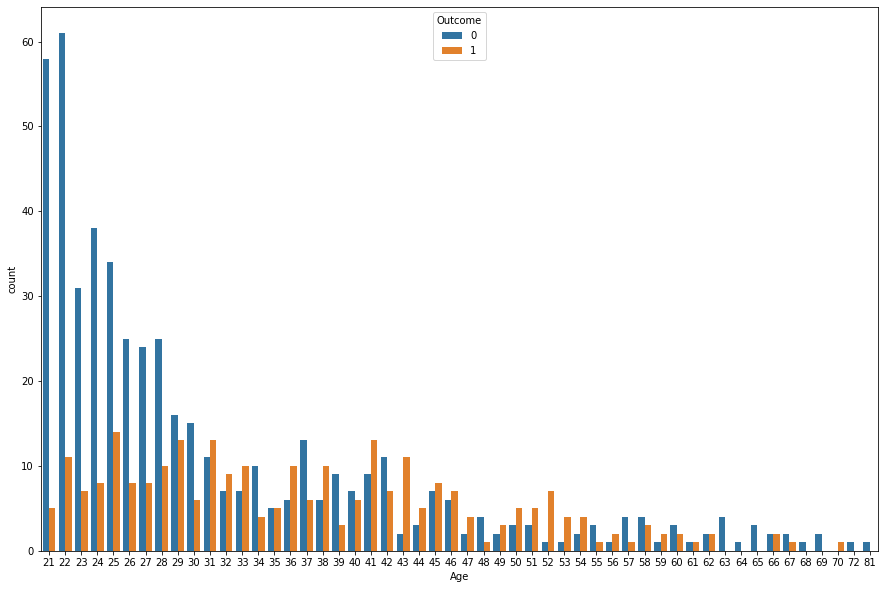

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Age', data = df, hue = 'Outcome')

<AxesSubplot:>

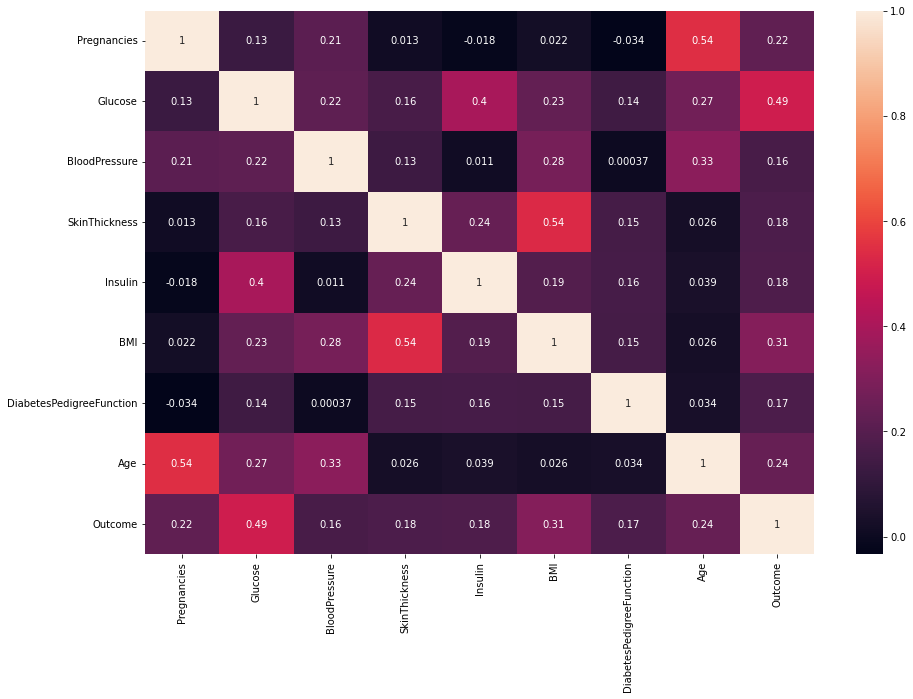

In [13]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:>

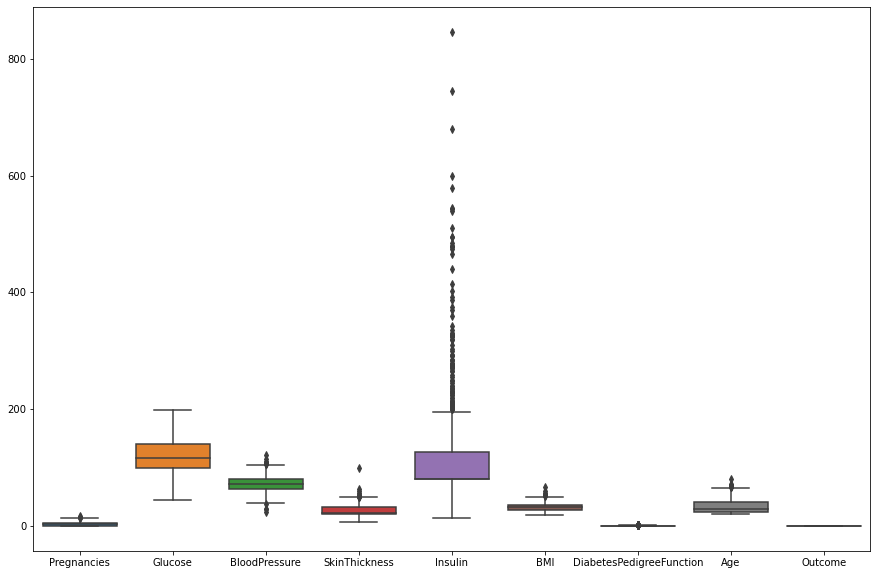

In [14]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df)

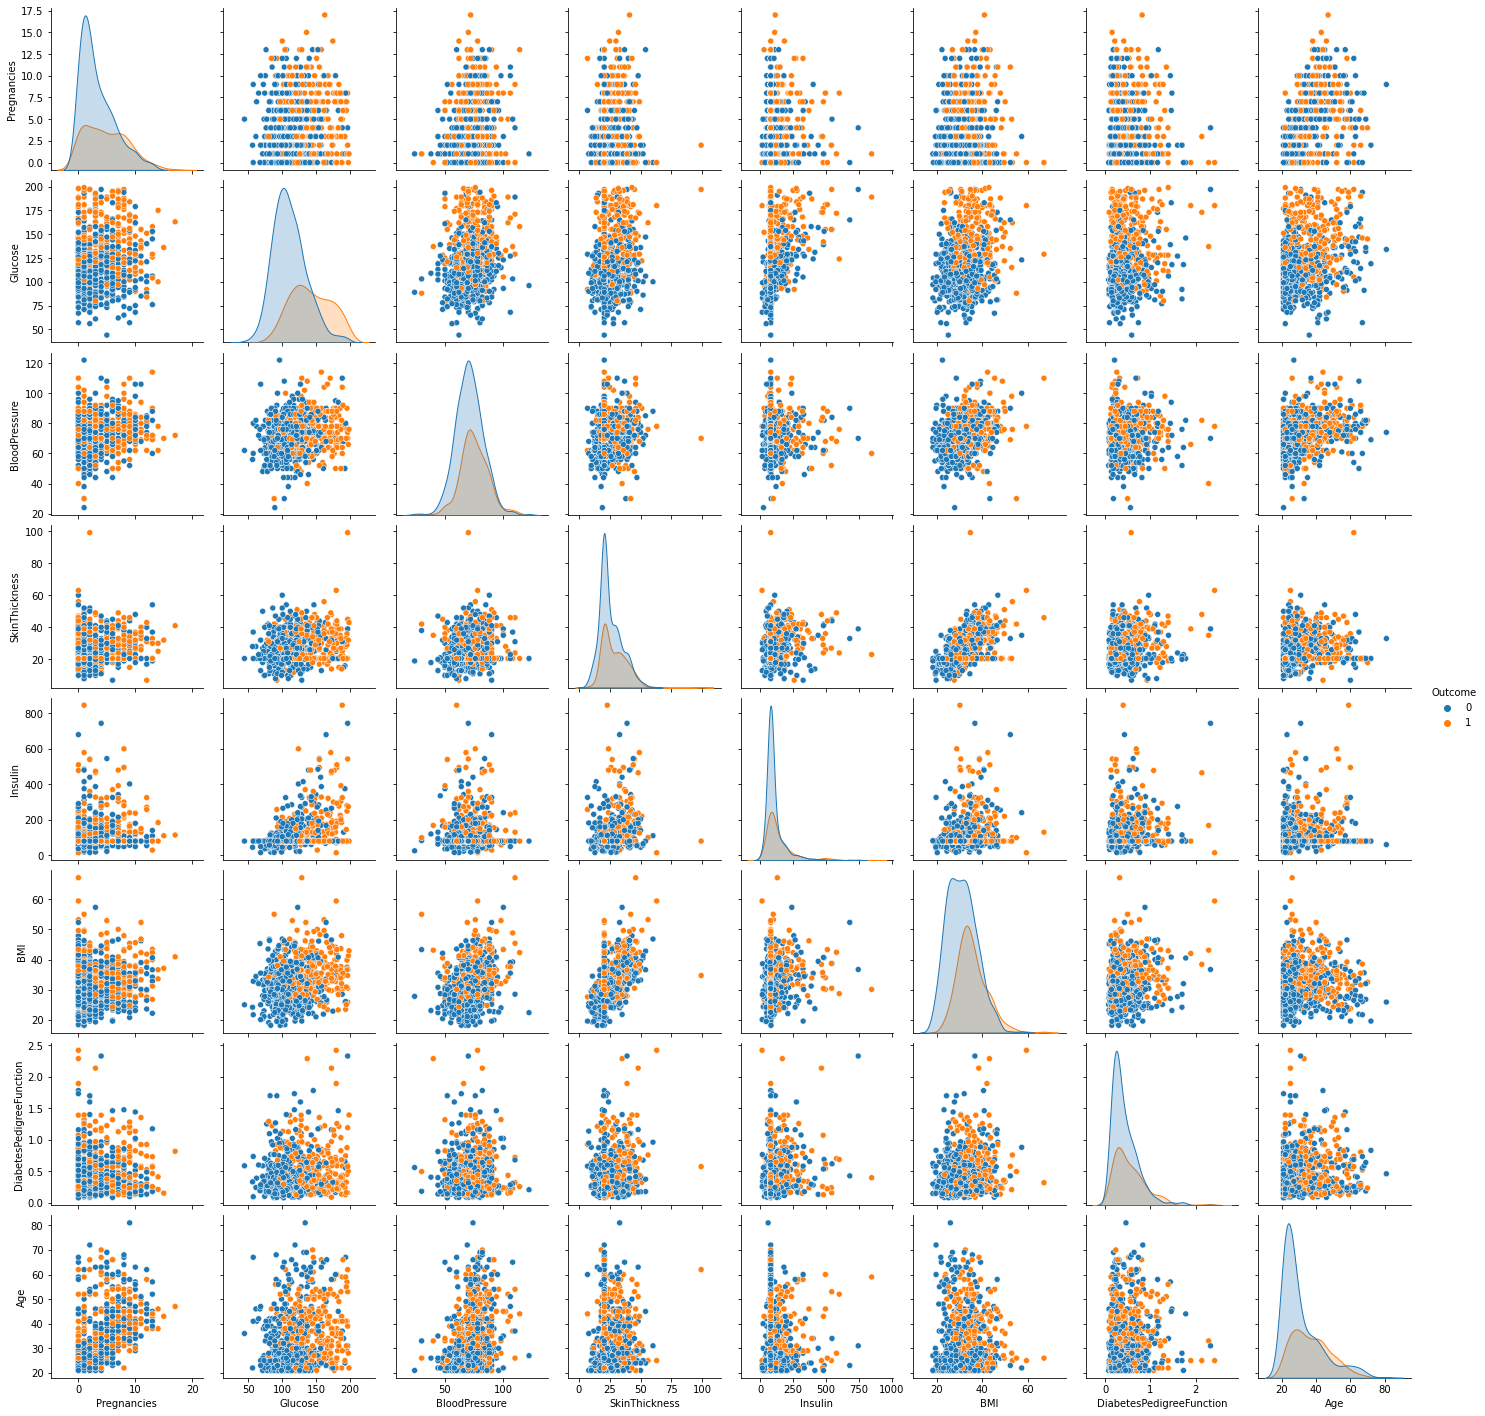

In [15]:
sns.pairplot(df, hue = 'Outcome')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split into X and y
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)

In [19]:
X_train.shape, X_test.shape

((691, 8), (77, 8))

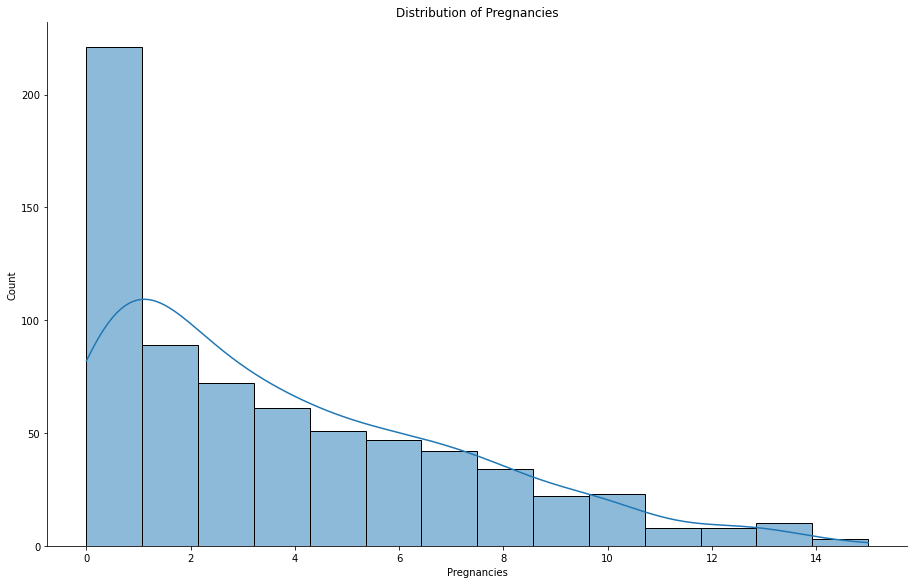

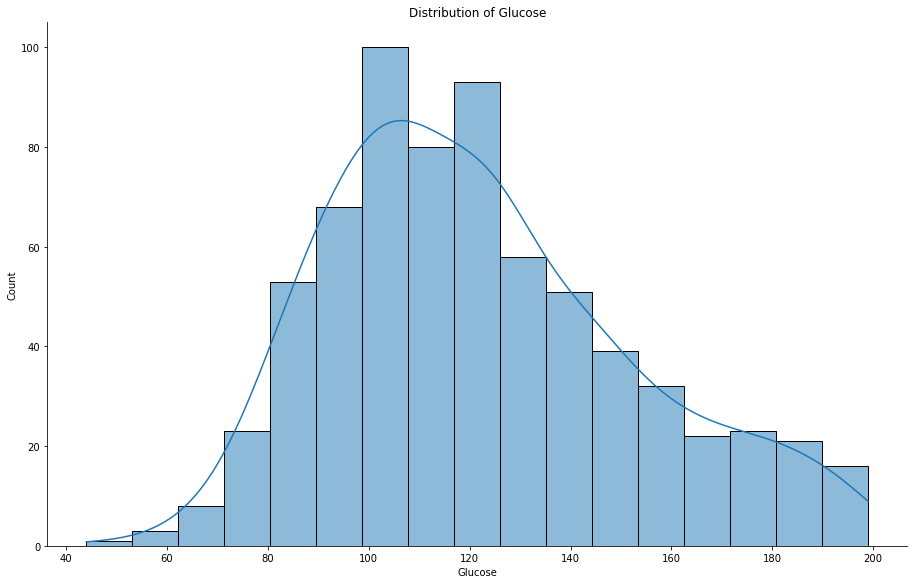

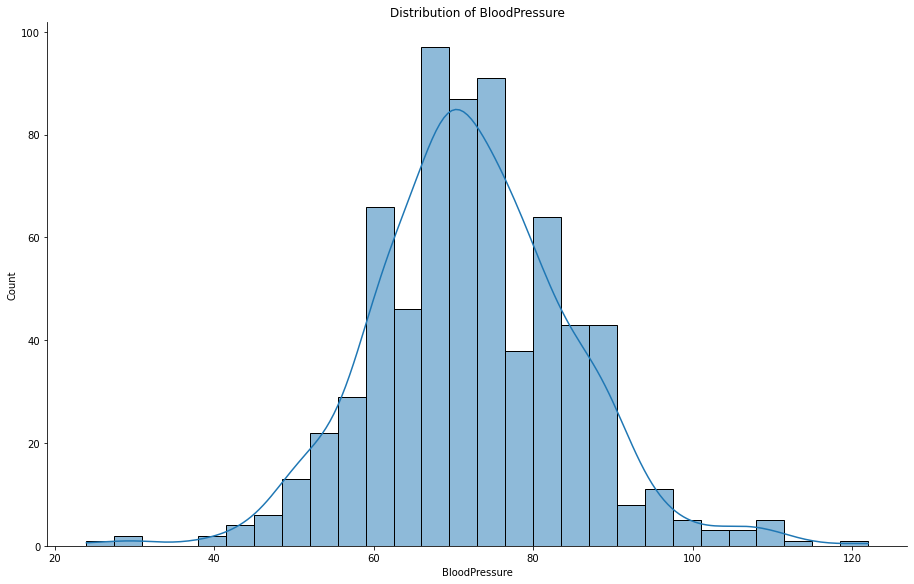

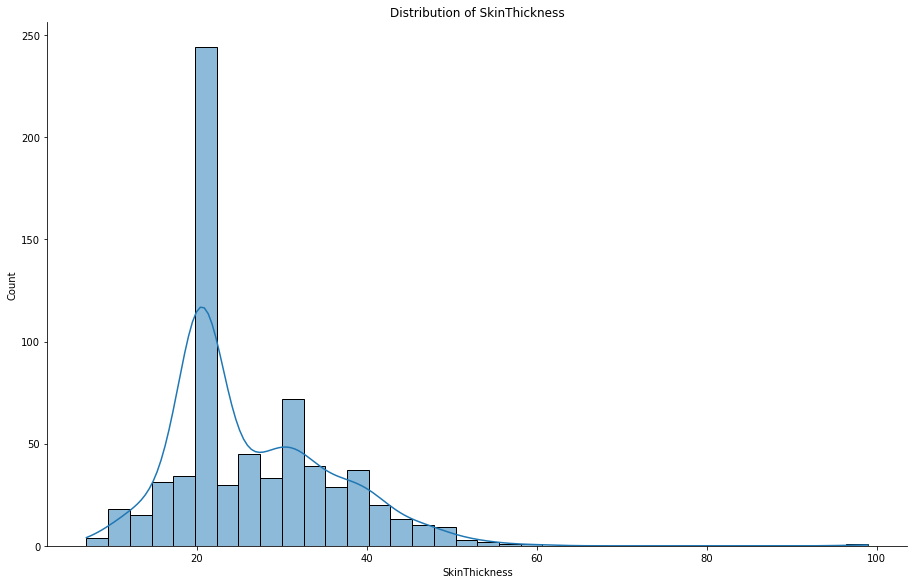

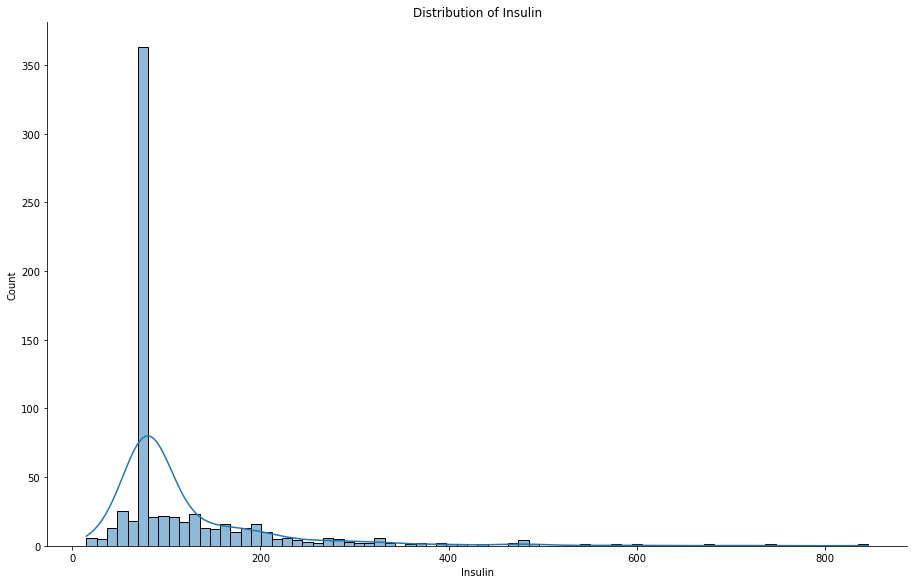

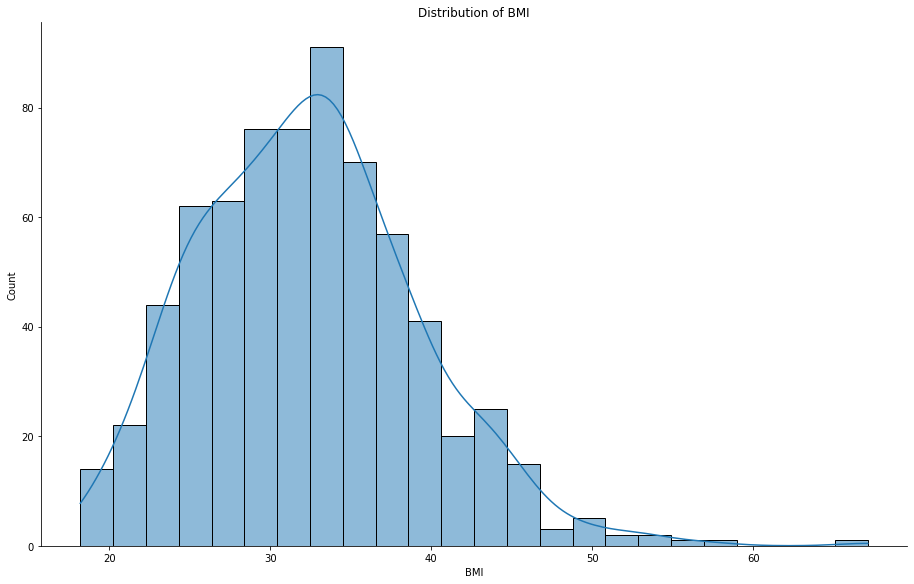

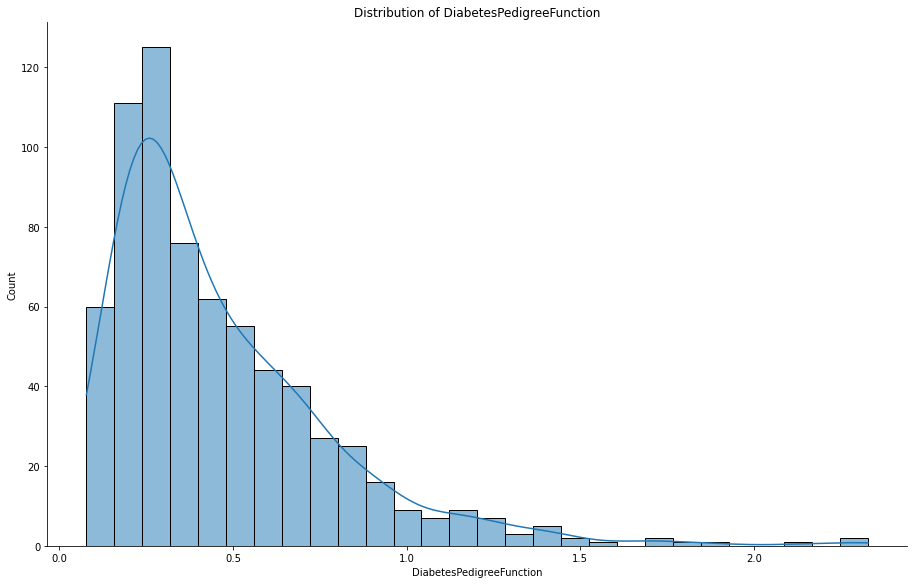

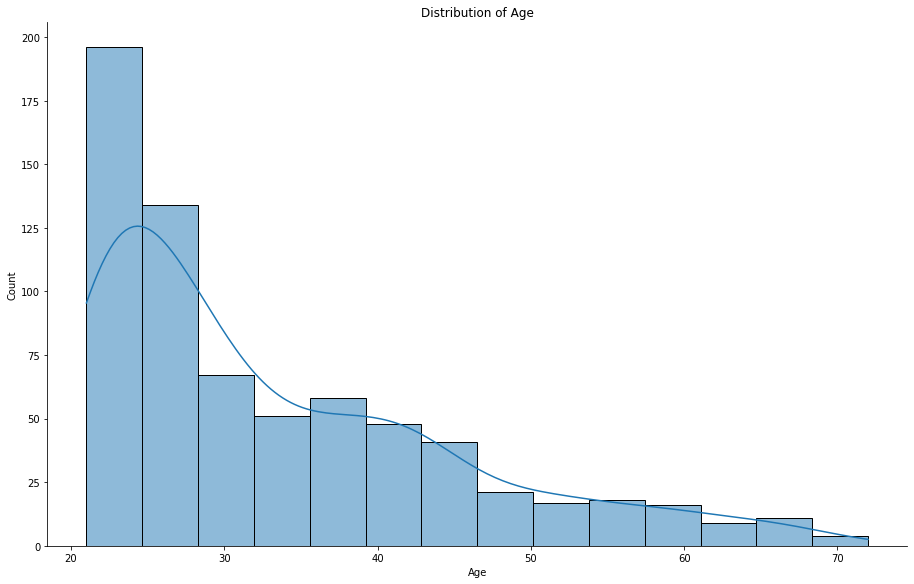

In [20]:
for i in range(len(X_train.columns)):
  plot_continuous_distribution(X_train, X_train.columns[i])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

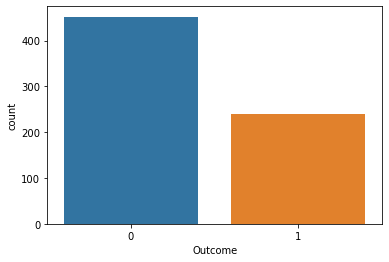

In [21]:
sns.countplot(y_train)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

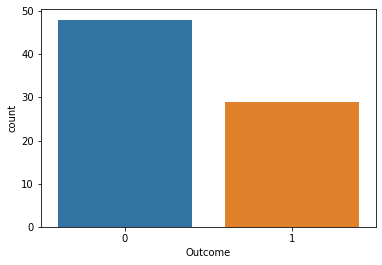

In [22]:
sns.countplot(y_test)

## Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
abc = AdaBoostClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [28]:
def cv_score(model, X, y):
  score = cross_val_score(model, X = X, y = y, scoring="f1", cv = 10).mean()
  print(score)

In [29]:
for i in [lgr, dtc, rfc, xgb, abc, knn, svc]:
  cv_score(i, X_train_scaled, y_train)

0.6160728255003862
0.560119240841144
0.5989132951227696
0.5967407480189957
0.6122081999098651
0.5725830971317805
0.5709963684963685


In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {"max_depth":np.arange(2, 12, 1),
              "learning_rate":np.arange(0.1, 0.5, 1),
              "n_estimators":[100]}

In [32]:
grid_search = GridSearchCV(xgb,
                            param_grid,
                            scoring = 'f1',
                            cv = 10
             )

In [33]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': [100]},
             scoring='f1')

In [34]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

In [35]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [36]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [37]:
best_model =  grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [38]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [39]:
y_train_pred = best_model.predict(X_train_scaled)

In [40]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [41]:
f1_score(y_train, y_train_pred)

1.0

In [42]:
f1_score(y_test, y_pred)

0.7547169811320755

In [43]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       452
           1       1.00      1.00      1.00       239

    accuracy                           1.00       691
   macro avg       1.00      1.00      1.00       691
weighted avg       1.00      1.00      1.00       691



In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        48
           1       0.83      0.69      0.75        29

    accuracy                           0.83        77
   macro avg       0.83      0.80      0.81        77
weighted avg       0.83      0.83      0.83        77



<AxesSubplot:>

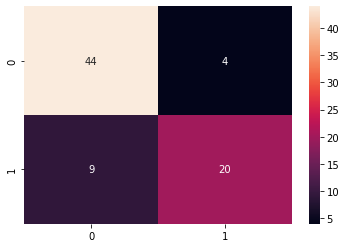

In [45]:
cf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat, annot = True)

In [46]:
import pickle

In [47]:
#filename = 'diabetes_model.sav'
best_model.save_model('diabetes_model.sav')

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:722: UserWarning: max_depth is not saved in Scikit-Learn meta.
  warnings.warn(str(k) + ' is not saved in Scikit-Learn meta.', UserWarning)


In [48]:
import joblib
filename = 'diabetes_model.sav'
joblib.dump(best_model, filename)

['diabetes_model.sav']